In [1]:
import pandas as pd
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

e:\repos\SURP-2024\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel('GS1.xlsx')
df.sample(3)

,Year,Question,Subject,Sub-Topic
188,2014,What were the events that led to the Suez Cris...,History,Colonization and decolonization
157,2016,Present an account of the Indus Water Treaty a...,Geography,Drainage Basins
72,2020,"Since the decade of the 1920s, the national mo...",History,Indian National Movement


In [4]:
questions = df['Question'].values.tolist()
questions[:3]

['Explain the role of geographical factors towards the development of Ancient India.',
 'What was the difference between Mahatma Gandhi and Rabindranath Tagore in their approach towards education and nationalism?',
 'Bring out the socio-economic effects of the introduction of railways in different countries of the world']

In [5]:
#PIPELINE OF BERTMODEL
# 1. EMBEDDING - BY DEFAULT USES all-MiniLM-L6-v2 SENTENCE TRANSFORMER
# 2.  

In [6]:
#WE WILL USE THE BERTOPIC MODEL TO CLUSTER THE QUESTIONS
#FIRST USING DEFAULT MODEL

model = BERTopic()
topics, probs = model.fit_transform(questions)

In [7]:
model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,54,-1_the_of_in_and,"[the, of, in, and, india, is, for, discuss, on...",[Why did the industrial revolution first occur...
1,0,62,0_the_of_and_in,"[the, of, and, in, water, how, on, are, explai...",[Briefly mention the alignment of major mounta...
2,1,32,1_in_the_indian_and,"[in, the, indian, and, society, cultural, of, ...",[Has caste lost its relevance in understanding...
3,2,28,2_of_the_in_india,"[of, the, in, india, to, new, discuss, with, h...",[Account for the change in the spatial pattern...
4,3,27,3_the_british_of_to,"[the, british, of, to, in, was, were, india, e...","[What were the major political, economic and s..."
5,4,18,4_the_art_of_architecture,"[the, art, of, architecture, indian, and, disc...",[Mesolithic rock cut architecture of India not...
6,5,14,5_women_in_the_india,"[women, in, the, india, womens, sex, ratio, of...",[‘Women’s movement in India has not addressed ...


In [8]:
model.generate_topic_labels(topic_prefix=False,separator=', ')

['the, of, in',
 'the, of, and',
 'in, the, indian',
 'of, the, in',
 'the, british, of',
 'the, art, of',
 'women, in, the']

In [9]:
model.visualize_documents(questions)

In [10]:
#USING DIFFERENT WORD EMBEDDINGS
#USING SENTENCE TRANSFORMER
"""
    The all-mpnet-base-v2 model provides superior accuracy and a deeper understanding of the context and nuances in the text.
    Given the manageable size of your dataset (200-300 questions), 
    the additional computational resources required by this model are justified by the improved performance and precision.  
    Recommendation : huggingface transformer model sentence-transformers/stsb-roberta-large is best for this with best accuracy as far as i could find,
    but requires so much computation my little laptop cannot handle.
    even this model all-mpnet-base-v2 is heavy but i can manage it. like it takes 4-5 minutes to run the model.  
"""
sentence_model = SentenceTransformer('all-mpnet-base-v2')

In [11]:
model  = BERTopic(embedding_model=sentence_model)
topics, probs = model.fit_transform(questions)

In [12]:
model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,48,-1_the_of_in_india,"[the, of, in, india, to, and, discuss, what, f...",[The women’s questions arose in modern India a...
1,0,64,0_the_of_and_in,"[the, of, and, in, water, how, on, are, why, i...",[What do you understand by the phenomenon of ‘...
2,1,37,1_the_of_and_to,"[the, of, and, to, in, british, india, their, ...",[How did the colonial rule affect the tribals ...
3,2,36,2_in_of_the_india,"[in, of, the, india, is, women, to, poverty, a...",[How do you explain the statistics that show t...
4,3,24,3_in_the_cultural_society,"[in, the, cultural, society, indian, secularis...","[In the context of the diversity of India, can..."
5,4,16,4_art_the_architecture_of,"[art, the, architecture, of, indian, and, in, ...",[Mesolithic rock cut architecture of India not...
6,5,10,5_energy_of_the_for,"[energy, of, the, for, in, oil, its, discuss, ...",[Account for the change in the spatial pattern...


In [13]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
embeddings = model._extract_embeddings(questions)
tsne = TSNE(n_components=2,random_state=42)
reduced = tsne.fit_transform(embeddings)

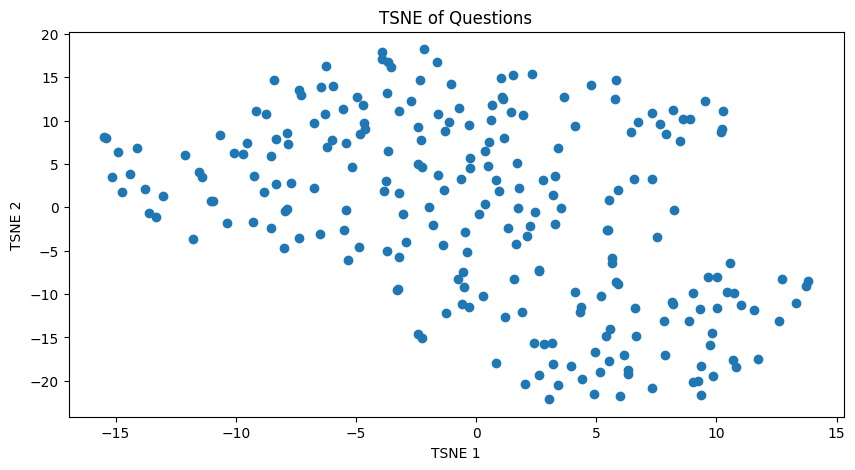

In [14]:
plt.figure(figsize=(10,5))
plt.scatter(reduced[:,0], reduced[:,1])
plt.title("TSNE of Questions")
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.show()

In [15]:
model.visualize_documents(questions)

In [16]:
#USING FINETUNING 
from bertopic.representation import KeyBERTInspired
from bertopic.representation import MaximalMarginalRelevance
from bertopic.representation import PartOfSpeech

representation = [PartOfSpeech("en_core_web_sm"),MaximalMarginalRelevance(diversity=0.2),KeyBERTInspired(top_n_words=30)]

model = BERTopic(embedding_model=sentence_model,representation_model=representation,verbose=True,calculate_probabilities=True, nr_topics=20, n_gram_range=(1, 3), min_topic_size=5)



In [17]:
topics, probs = model.fit_transform(questions)

2024-07-17 19:49:47,358 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|██████████| 8/8 [00:07<00:00,  1.06it/s]
2024-07-17 19:49:54,921 - BERTopic - Embedding - Completed ✓
2024-07-17 19:49:54,921 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-07-17 19:49:58,474 - BERTopic - Dimensionality - Completed ✓
2024-07-17 19:49:58,474 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-07-17 19:49:58,506 - BERTopic - Cluster - Completed ✓
2024-07-17 19:49:58,506 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-07-17 19:50:09,269 - BERTopic - Representation - Completed ✓
2024-07-17 19:50:09,269 - BERTopic - Topic reduction - Reducing number of topics
2024-07-17 19:50:09,269 - BERTopic - Topic reduction - Reduced number of topics from 11 to 11


In [18]:
model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,46,-1_indian society_resources of india_scheduled...,"[indian society, resources of india, scheduled...",[Why are the tribals in India referred to as '...
1,0,16,0_indian art_of medieval india_of temple archi...,"[indian art, of medieval india, of temple arch...",[Assess the importance of the accounts of the ...
2,1,12,1_energy in india_producing areas particularly...,"[energy in india, producing areas particularly...",[Account for the change in the spatial pattern...
3,2,49,2_colonial india_struggle for freedom_of india...,"[colonial india, struggle for freedom, of indi...",[Highlight the importance of the new objective...
4,3,11,3_ocean currents and_ocean currents describe_o...,"[ocean currents and, ocean currents describe, ...",[Explain the factors responsible for the origi...
5,4,18,4_of irrigation and_problems of droughts_of dr...,"[of irrigation and, problems of droughts, of d...",[Identify and discuss the factors responsible ...
6,5,28,5_landslides in the_landslides_glaciers_of lan...,"[landslides in the, landslides, glaciers, of l...",[Bring out the causes for the formation of hea...
7,6,17,6_of urbanization in_of urbanization_urbanizat...,"[of urbanization in, of urbanization, urbaniza...",[How is the growth of Tier 2 cities related to...
8,7,15,7_patriarchy impact the_the sex ratio_poverty ...,"[patriarchy impact the, the sex ratio, poverty...",[Critically examine whether growing population...
9,8,5,8_regionalism in india_regionalism substantiat...,"[regionalism in india, regionalism substantiat...",[Do we have cultural pockets of small India al...


In [19]:
model.visualize_documents(questions)

In [20]:
#UPDATING C-TF-IDF
from bertopic.vectorizers import ClassTfidfTransformer
ctfidf_model = ClassTfidfTransformer(bm25_weighting=True,reduce_frequent_words=True)
model = BERTopic(embedding_model=sentence_model,representation_model=representation,ctfidf_model=ctfidf_model,verbose=True,calculate_probabilities=True, nr_topics=20, n_gram_range=(1, 3), min_topic_size=5)

In [21]:
topics, probs = model.fit_transform(questions)

2024-07-17 19:50:22,684 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|██████████| 8/8 [00:07<00:00,  1.05it/s]
2024-07-17 19:50:30,332 - BERTopic - Embedding - Completed ✓
2024-07-17 19:50:30,333 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-07-17 19:50:35,133 - BERTopic - Dimensionality - Completed ✓
2024-07-17 19:50:35,136 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-07-17 19:50:35,156 - BERTopic - Cluster - Completed ✓
2024-07-17 19:50:35,158 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-07-17 19:50:47,173 - BERTopic - Representation - Completed ✓
2024-07-17 19:50:47,174 - BERTopic - Topic reduction - Reducing number of topics
2024-07-17 19:50:47,175 - BERTopic - Topic reduction - Reduced number of topics from 10 to 10


In [22]:
model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,47,-1_the indian society_indian society_india dis...,"[the indian society, indian society, india dis...",[Why are the tribals in India referred to as '...
1,0,9,0_energy in india_oil producing areas_oil prod...,"[energy in india, oil producing areas, oil pro...",[Despite India being one of the countries of t...
2,1,64,1_glaciers_climate_climate change_western ghats,"[glaciers, climate, climate change, western gh...",[What do you understand by the phenomenon of ‘...
3,2,18,2_indian art_of temple architecture_of the gup...,"[indian art, of temple architecture, of the gu...",[The rock-cut architecture represents one of t...
4,3,44,3_of indian independence_gandhi in the_of maha...,"[of indian independence, gandhi in the, of mah...",[Whereas the British planters had developed te...
5,4,18,4_of urbanization_of urbanization in_urbanizat...,"[of urbanization, of urbanization in, urbaniza...",[How is the growth of Tier 2 cities related to...
6,5,16,5_women in india_poverty is the_poverty is to_...,"[women in india, poverty is the, poverty is to...",[‘Despite implementation of various programmes...
7,6,7,6_regionalism in india_regionalism substantiat...,"[regionalism in india, regionalism substantiat...",[Growing feeling of regionalism is an importan...
8,7,6,7_indian society_sect in indian_vis vis caste_...,"[indian society, sect in indian, vis vis caste...",[How does Indian society maintain continuity i...
9,8,6,8_of secularism discuss_secularism differ from...,"[of secularism discuss, secularism differ from...",[How the Indian concept of secularism differen...


In [23]:
model.visualize_documents(questions)

In [24]:
model.visualize_barchart()

In [26]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:

stop_words = set(stopwords.words('english'))

    # Add question words to the set of stopwords
question_words = {'explain', 'what', 'when', 'where', 'who', 'whom', 'which', 'why', 'how', 
                        'comment', 'discuss','following', 'example', 
                        'examine', 'state', 'critically','context', 'measures', 
                        'suggest', 'evaluate', 'describe', 'identify', 'illustrate',}
stop_words.update(question_words)
stop_words = list(stop_words)

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_model = CountVectorizer(stop_words=stop_words, ngram_range=(1, 3))# modify stop-words to include more words
model.update_topics(questions,vectorizer_model=vectorizer_model)

In [31]:
model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,47,-1_india_society_indian society_indian,"[india, society, indian society, indian, ident...",[Why are the tribals in India referred to as '...
1,0,9,0_energy_india_raw material_mining,"[energy, india, raw material, mining, potentia...",[Despite India being one of the countries of t...
2,1,64,1_water_india_world_resources,"[water, india, world, resources, climate, weat...",[What do you understand by the phenomenon of ‘...
3,2,18,2_art_architecture_indian_early,"[art, architecture, indian, early, history, pe...",[The rock-cut architecture represents one of t...
4,3,44,3_india_british_mahatma gandhi_gandhi,"[india, british, mahatma gandhi, gandhi, mahat...",[Whereas the British planters had developed te...
5,4,18,4_india_cities_new_smart,"[india, cities, new, smart, urban, delhi, indu...",[How is the growth of Tier 2 cities related to...
6,5,16,5_women_poverty_india_population,"[women, poverty, india, population, sex, ratio...",[‘Despite implementation of various programmes...
7,6,7,6_regionalism_cultural_states_basis,"[regionalism, cultural, states, basis, diversi...",[Growing feeling of regionalism is an importan...
8,7,6,7_caste_indian society_society_vis,"[caste, indian society, society, vis, indian, ...",[How does Indian society maintain continuity i...
9,8,6,8_secularism_practices_debates_indian,"[secularism, practices, debates, indian, makin...",[How the Indian concept of secularism differen...


In [32]:
model.visualize_documents(questions)

In [33]:
model.visualize_topics()

In [34]:
model.visualize_barchart()

In [35]:
topics_label = model.get_topic_info()['Name'].tolist()
for i in range(len(topics_label)):
    topics_label[i] = ' '.join(topics_label[i].split('_')[1:])
topics_label

['india society indian society indian',
 'energy india raw material mining',
 'water india world resources',
 'art architecture indian early',
 'india british mahatma gandhi gandhi',
 'india cities new smart',
 'women poverty india population',
 'regionalism cultural states basis',
 'caste indian society society vis',
 'secularism practices debates indian']

In [36]:
question_index = 120
topic_probabilities = probs[question_index]
significant_probs = topic_probabilities[topic_probabilities > 0.05]
significant_topics = np.arange(len(topic_probabilities))[topic_probabilities > 0.05]
others = np.sum(topic_probabilities[topic_probabilities <= 0.05])

# Labels for the pie chart
labels = [topics_label[i+1] for i in significant_topics] + ["Others"]

# Probabilities to plot
probs_to_plot = np.append(significant_probs, others)

In [37]:
probs[question_index]

array([1.03735393e-308, 7.46151809e-309, 1.00000000e+000, 1.95896729e-308,
       1.30526049e-308, 1.30420720e-308, 1.99009255e-308, 2.05794367e-308,
       2.21413290e-308])

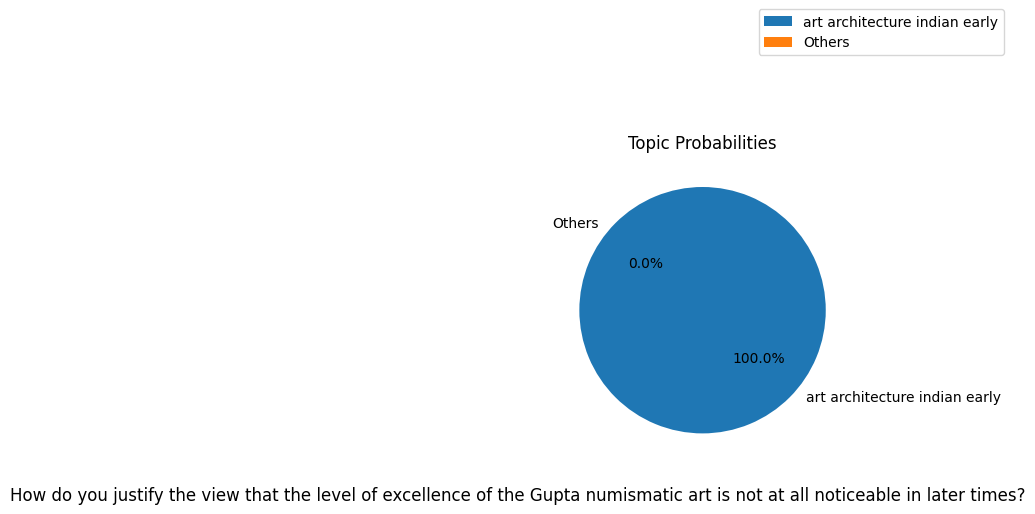

In [38]:
plt.figure(figsize=(4, 4))
plt.pie(probs_to_plot, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Topic Probabilities')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.5))
plt.text(-1.5, -1.5, questions[question_index], fontsize=12, ha="center", va="center")
plt.show()

In [39]:
df['Topic_Number'] = topics
df.sample(5)

,Year,Question,Subject,Sub-Topic,Topic_Number
20,2022,How will you explain the medieval Indian templ...,History,Architecture and Sculptures,2
50,2021,To what extent did the role of the moderates p...,History,Indian National Congress,3
40,2021,Evaluate the nature of the Bhakti Literature a...,History,Religion and Philosophy,2
126,2017,Mention the advantages of the cultivation of p...,Geography,Agriculture and Allied Sectors(geo),-1
23,2022,Describe the characteristics and types of prim...,Geography,Geomorphology,1


In [40]:

df['Topic'] = df['Topic_Number'].apply(lambda x: " ".join(model.get_topic_info(topic=x)['Name'].iloc[0].split('_')[1:]))

# Display the first few rows of the DataFrame
df.head()

,Year,Question,Subject,Sub-Topic,Topic_Number,Topic
0,2023,Explain the role of geographical factors towar...,History,Prehistoric Era,-1,india society indian society indian
1,2023,What was the difference between Mahatma Gandhi...,History,Important Personalities,3,india british mahatma gandhi gandhi
2,2023,Bring out the socio-economic effects of the in...,History,Industrial Revolution,4,india cities new smart
3,2023,Discuss the consequences of climate change on ...,Geography,Climate Change,1,water india world resources
4,2023,Why is the world today confronted with a crisi...,Geography,Land and Water Resources,1,water india world resources


In [57]:
outliers = df[df['Topic_Number'] == -1]['Question'].values.tolist()
outliers

['Explain the role of geographical factors towards the development of Ancient India.',
 'Child cuddling is now being replaced by mobile phones. Discuss its impact on the socialization of children.',
 'What are the main features of Vedic society and religion? Do you think some of the features are still prevailing in Indian society?',
 'What were the major technological changes introduced during the Sultanate period? How did those technological changes influence the Indian society?',
 'Why did human development fail to keep pace with economic development in India?',
 'From being net food importer in 1960s, India has emerged as a net food exporter to the world. Provide reasons.',
 'Discuss the impact of post-liberal economy on ethnic identity and communalism.',
 'Why was there a sudden spurt in famines in colonial India since the mid-eighteenth century? Give reasons.',
 'Explore and evaluate the impact of ‘Work From Home’ on family relationships.',
 'Given the diversities among the tribal

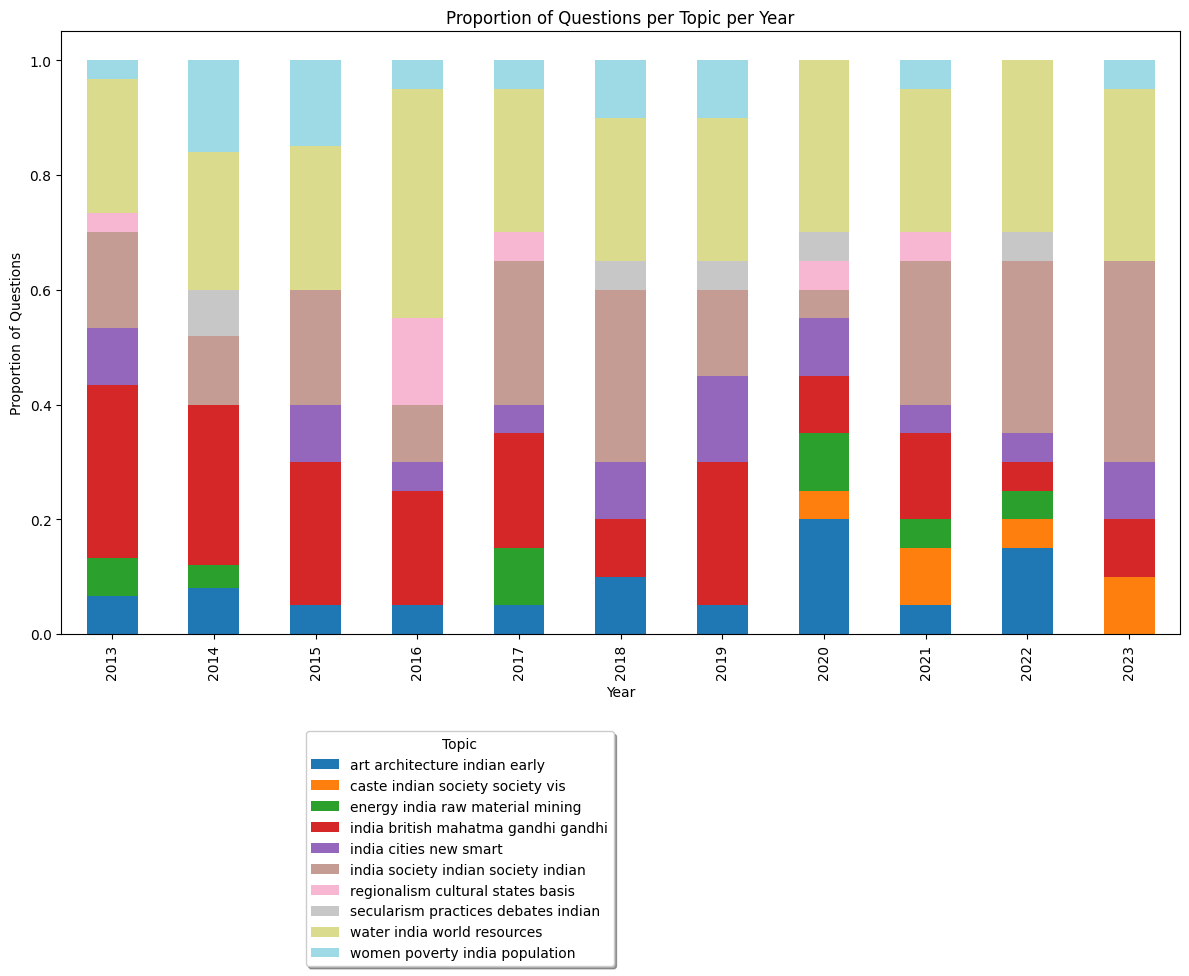

In [41]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


# Step 2: Count questions per topic per year
topic_year_counts = df.groupby(['Year', 'Topic']).size().reset_index(name='Count')

# Calculate the total number of questions per year
total_questions_per_year = topic_year_counts.groupby('Year')['Count'].transform('sum')

# Calculate the proportion of questions per topic per year
topic_year_counts['Proportion'] = topic_year_counts['Count'] / total_questions_per_year

# Step 3: Prepare data for plotting (normalized)
pivot_table = topic_year_counts.pivot(index='Year', columns='Topic', values='Proportion')

# Generate a list of colors from a colormap
num_topics = len(pivot_table.columns)
colors = plt.get_cmap('tab20', num_topics)

# Step 4: Plot the normalized data with different colors for each topic
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8), color=[colors(i) for i in range(num_topics)])

# Step 5: Customize the plot
plt.xlabel('Year')
plt.ylabel('Proportion of Questions')
plt.title('Proportion of Questions per Topic per Year')
plt.legend(title='Topic', loc='best', bbox_to_anchor=(0.5, -0.15), ncol=1, fancybox=True, shadow=True)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()

In [43]:
num_words = 10

for topic_num in set(topics):
    if topic_num != -1:  # -1 is the outlier class in BERTopic
        topic = model.get_topic(topic_num)
        if topic:  # Check if topic is not None
            top_words = [word for word, _ in topic[:num_words]]
            print(f"Topic {topic_num}: {top_words}")
            

Topic 0: ['energy', 'india', 'raw material', 'mining', 'potential', 'material', 'steel', 'spatial', 'energy india', 'iron']
Topic 1: ['water', 'india', 'world', 'resources', 'climate', 'weather', 'impact', 'causes', 'examples', 'monsoon']
Topic 2: ['art', 'architecture', 'indian', 'early', 'history', 'period', 'temple', 'gupta', 'rock cut', 'early indian']
Topic 3: ['india', 'british', 'mahatma gandhi', 'gandhi', 'mahatma', 'colonial', 'economic', 'movement', 'century', 'policies']
Topic 4: ['india', 'cities', 'new', 'smart', 'urban', 'delhi', 'industrial corridors', 'corridors', 'employment', 'socio economic']
Topic 5: ['women', 'poverty', 'india', 'population', 'sex', 'ratio', 'sex ratio', 'social', 'increasing', 'women india']
Topic 6: ['regionalism', 'cultural', 'states', 'basis', 'diversity india', 'diversity', 'india appears', 'linguistic', 'linguistic states', 'issues socio']
Topic 7: ['caste', 'indian society', 'society', 'vis', 'indian', 'place caste lost', 'reference young be

In [44]:
#DECIDING TOPIC NAME BASED ON TOP WORDS
topic_names = {0:'Energy',1:'Climate',2:'Architecture',3:'Modern History',4:'Development',5:'Gender Inequality',6:'Diversity',7:'Caste And Society',8:'Socialism'}

In [48]:
topics_ = []
for topic_num in set(topics):
    if topic_num != -1:  # -1 is the outlier class in BERTopic
        topic = model.get_topic(topic_num)
        if topic:  # Check if topic is not None
            top_words = [word for word, _ in topic[:num_words]]
            top_words = " ".join(top_words)
            topics_.append(f"{topic_names[topic_num]}: {top_words}")

In [49]:
topics_

['Energy: energy india raw material mining potential material steel spatial energy india iron',
 'Climate: water india world resources climate weather impact causes examples monsoon',
 'Architecture: art architecture indian early history period temple gupta rock cut early indian',
 'Modern History: india british mahatma gandhi gandhi mahatma colonial economic movement century policies',
 'Development: india cities new smart urban delhi industrial corridors corridors employment socio economic',
 'Gender Inequality: women poverty india population sex ratio sex ratio social increasing women india',
 'Diversity: regionalism cultural states basis diversity india diversity india appears linguistic linguistic states issues socio',
 'Caste And Society: caste indian society society vis indian place caste lost reference young bengal religious reform place caste reference young',
 'Socialism: secularism practices debates indian making indian medieval saints failed name western model making indian

In [50]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [58]:
sbert_model = SentenceTransformer('all-mpnet-base-v2')
question_embeddings = sbert_model.encode(questions)
topic_embeddings = sbert_model.encode(topics_)
similarity_matrix = cosine_similarity(question_embeddings, topic_embeddings)
most_similar_topics = np.argmax(similarity_matrix, axis=1)

for i, question in enumerate(questions):
    print(f"Question: {question}")
    print(f"Most Similar Topic: {topics_[most_similar_topics[i]].split(':')[0]}")

Question: Explain the role of geographical factors towards the development of Ancient India.
Most Similar Topic: Architecture
Question: What was the difference between Mahatma Gandhi and Rabindranath Tagore in their approach towards education and nationalism?
Most Similar Topic: Modern History
Question: Bring out the socio-economic effects of the introduction of railways in different countries of the world
Most Similar Topic: Development
Question: Discuss the consequences of climate change on the food security in tropical countries.
Most Similar Topic: Climate
Question: Why is the world today confronted with a crisis of availability of and access to freshwater resources?
Most Similar Topic: Climate
Question: How are the fjords formed? Why do they constitute some of the most picturesque areas of the world?
Most Similar Topic: Climate
Question: Why is the South-West monsoon called ‘Purvaiya’ (easterly) in Bhojpur Region? How has this directional seasonal wind system influenced the cultur

In [61]:
data = pd.DataFrame({'Question': questions, 'Topic': [topics_[most_similar_topics[i]].split(':')[0] for i in range(len(questions))]})

In [62]:
data.to_excel('GS1_topics.xlsx', index=False)